Checking values and distributions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
data = pd.read_csv('data.csv')

In [2]:
columns = data.columns
for col in columns:
    print(f'{col} column has unique values: {np.sort(data[col].unique())}')

PDEN10 column has unique values: [1 2 3]
COUTYP4 column has unique values: [1 2 3]
MAIIN102 column has unique values: [1 2]
AGE3 column has unique values: [ 4  5  6  7  8  9 10 11]
SERVICE column has unique values: [1 2]
MOVSINPYR2 column has unique values: [0 1 2 3]
SEXIDENT column has unique values: [1 2 3]
SPEAKENGL column has unique values: [1 2 3 4]
LVLDIFSEE2 column has unique values: [1 2 3]
LVLDIFHEAR2 column has unique values: [1 2 3]
LVLDIFWALK2 column has unique values: [1 2 3]
LVLDIFMEM2 column has unique values: [1 2 3]
LVLDIFCARE2 column has unique values: [1 2 3]
LVLDIFCOMM2 column has unique values: [1 2 3]
IRSEX column has unique values: [1 2]
IRMARIT column has unique values: [1 2 3 4]
IREDUHIGHST2 column has unique values: [ 1  2  3  4  5  6  7  8  9 10 11]
NEWRACE2 column has unique values: [1 2 3 4 5 6 7]
HEALTH2 column has unique values: [1. 2. 3. 4.]
EDUSCHLGO column has unique values: [1 2 3]
MILTFAMLY column has unique values: [1 2]
IRWRKSTAT column has unique 

In [3]:
categorical = ['PDEN10','COUTYP4','MAIIN102','AGE3','SERVICE','MOVSINPYR2','SEXIDENT','SPEAKENGL','LVLDIFSEE2','LVLDIFHEAR2','LVLDIFWALK2','LVLDIFMEM2','LVLDIFCARE2','LVLDIFCOMM2','IRSEX','IRMARIT','IREDUHIGHST2','NEWRACE2','HEALTH2','EDUSCHLGO','MILTFAMLY','IRWRKSTAT','IRHHSIZ2','IRKI17_2','IRHH65_2','IRINSUR4','IRPINC3','IRFAMIN3','GOVTPROG','POVERTY3','BOOKED','PREG2','COCLNEGMH','IRCIGRC','IRNICVAPREC','IRALCRC','IRCBDHMPREC','IRMJRC','IRCIGFM','IRNICVAP30N','IRALCFM','IRMJFM','SMIPY','MICATPY']
numerical = ['BMI2','SMIPPPY']

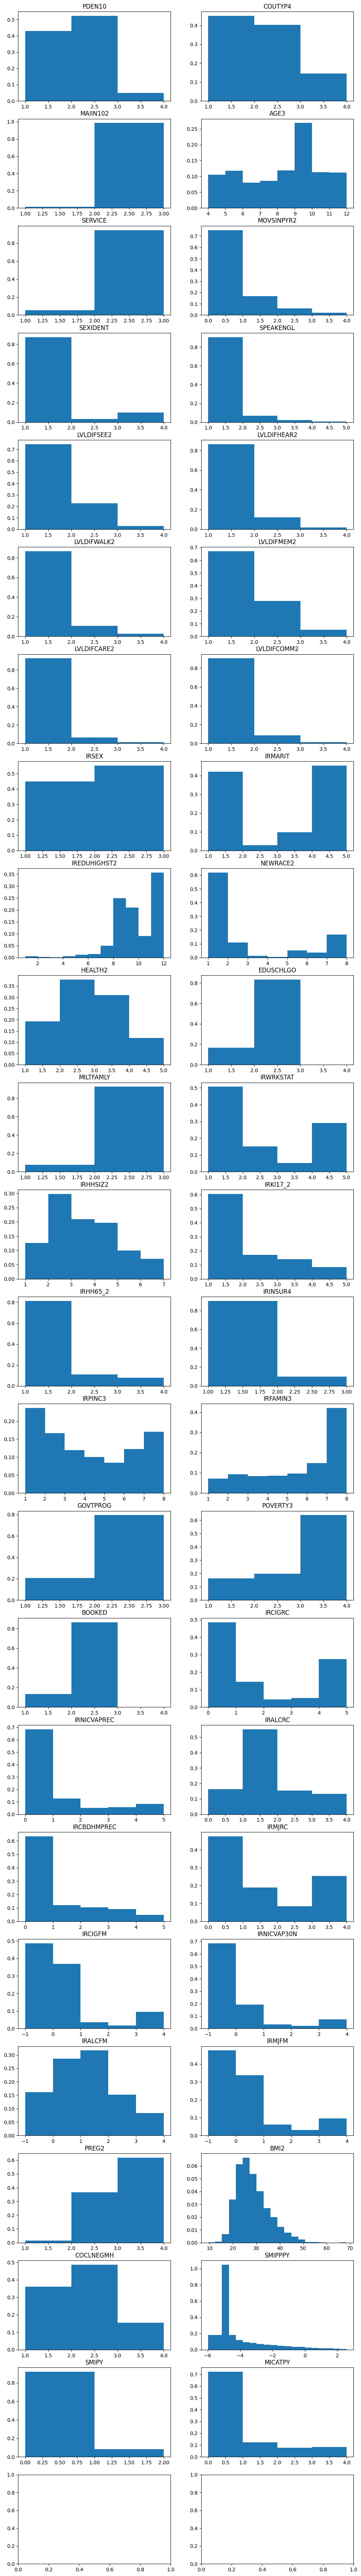

In [4]:
import matplotlib.pyplot as plt

# plotting histograms of all attributes
def hist(data, cat, num, density=True):
    fig, axs = plt.subplots((len(data.columns))//2+1, 2, figsize=(12,(len(data.columns))*2))
    for i in range(len(data.columns)):
        col = data.columns[i]
        
        # if categorical, define bin width
        if col in cat:
            bins = np.arange(data[col].min(), data[col].max()+2)
        else:
            bins = 20
        
        # n//2 by 2 subplots
        if i % 2 == 0:
            axs[i//2,0].hist(data[[col]], bins = bins, density = density)
            axs[i//2,0].set_title(col)
        else:
            axs[(i-1)//2,1].hist(data[[col]], bins = bins, density = density)
            axs[(i-1)//2,1].set_title(col)

hist(data, categorical, numerical)

Taking a closer look at SMIPPPY

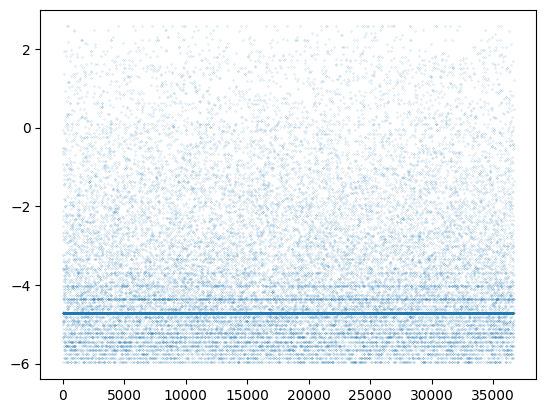

In [5]:
n_obs = data.shape[0]
# plot SMIPPPY against index
plt.scatter(range(n_obs), data['SMIPPPY'], s=0.01)

In [6]:
# we observe a 'line' at around -4.7?
# suggests VERY HIGH class imbalance - maybe SMIPPPY unsuitable
data['SMIPPPY'].value_counts()

SMIPPPY
-4.701700    14318
-4.363180      866
-5.231269      626
-5.443096      614
-5.549010      592
             ...  
-2.020100        1
-3.153335        1
-1.926324        1
-0.005738        1
-1.413392        1
Name: count, Length: 3855, dtype: int64

In [7]:
# find out which value the original SMIPPY (before logit transform) corresponds to
SMIPPPY_mode = data['SMIPPPY'].mode()
np.exp(SMIPPPY_mode)/(1+np.exp(SMIPPPY_mode))

0    0.008998
Name: SMIPPPY, dtype: float64

Covariance

<Axes: >

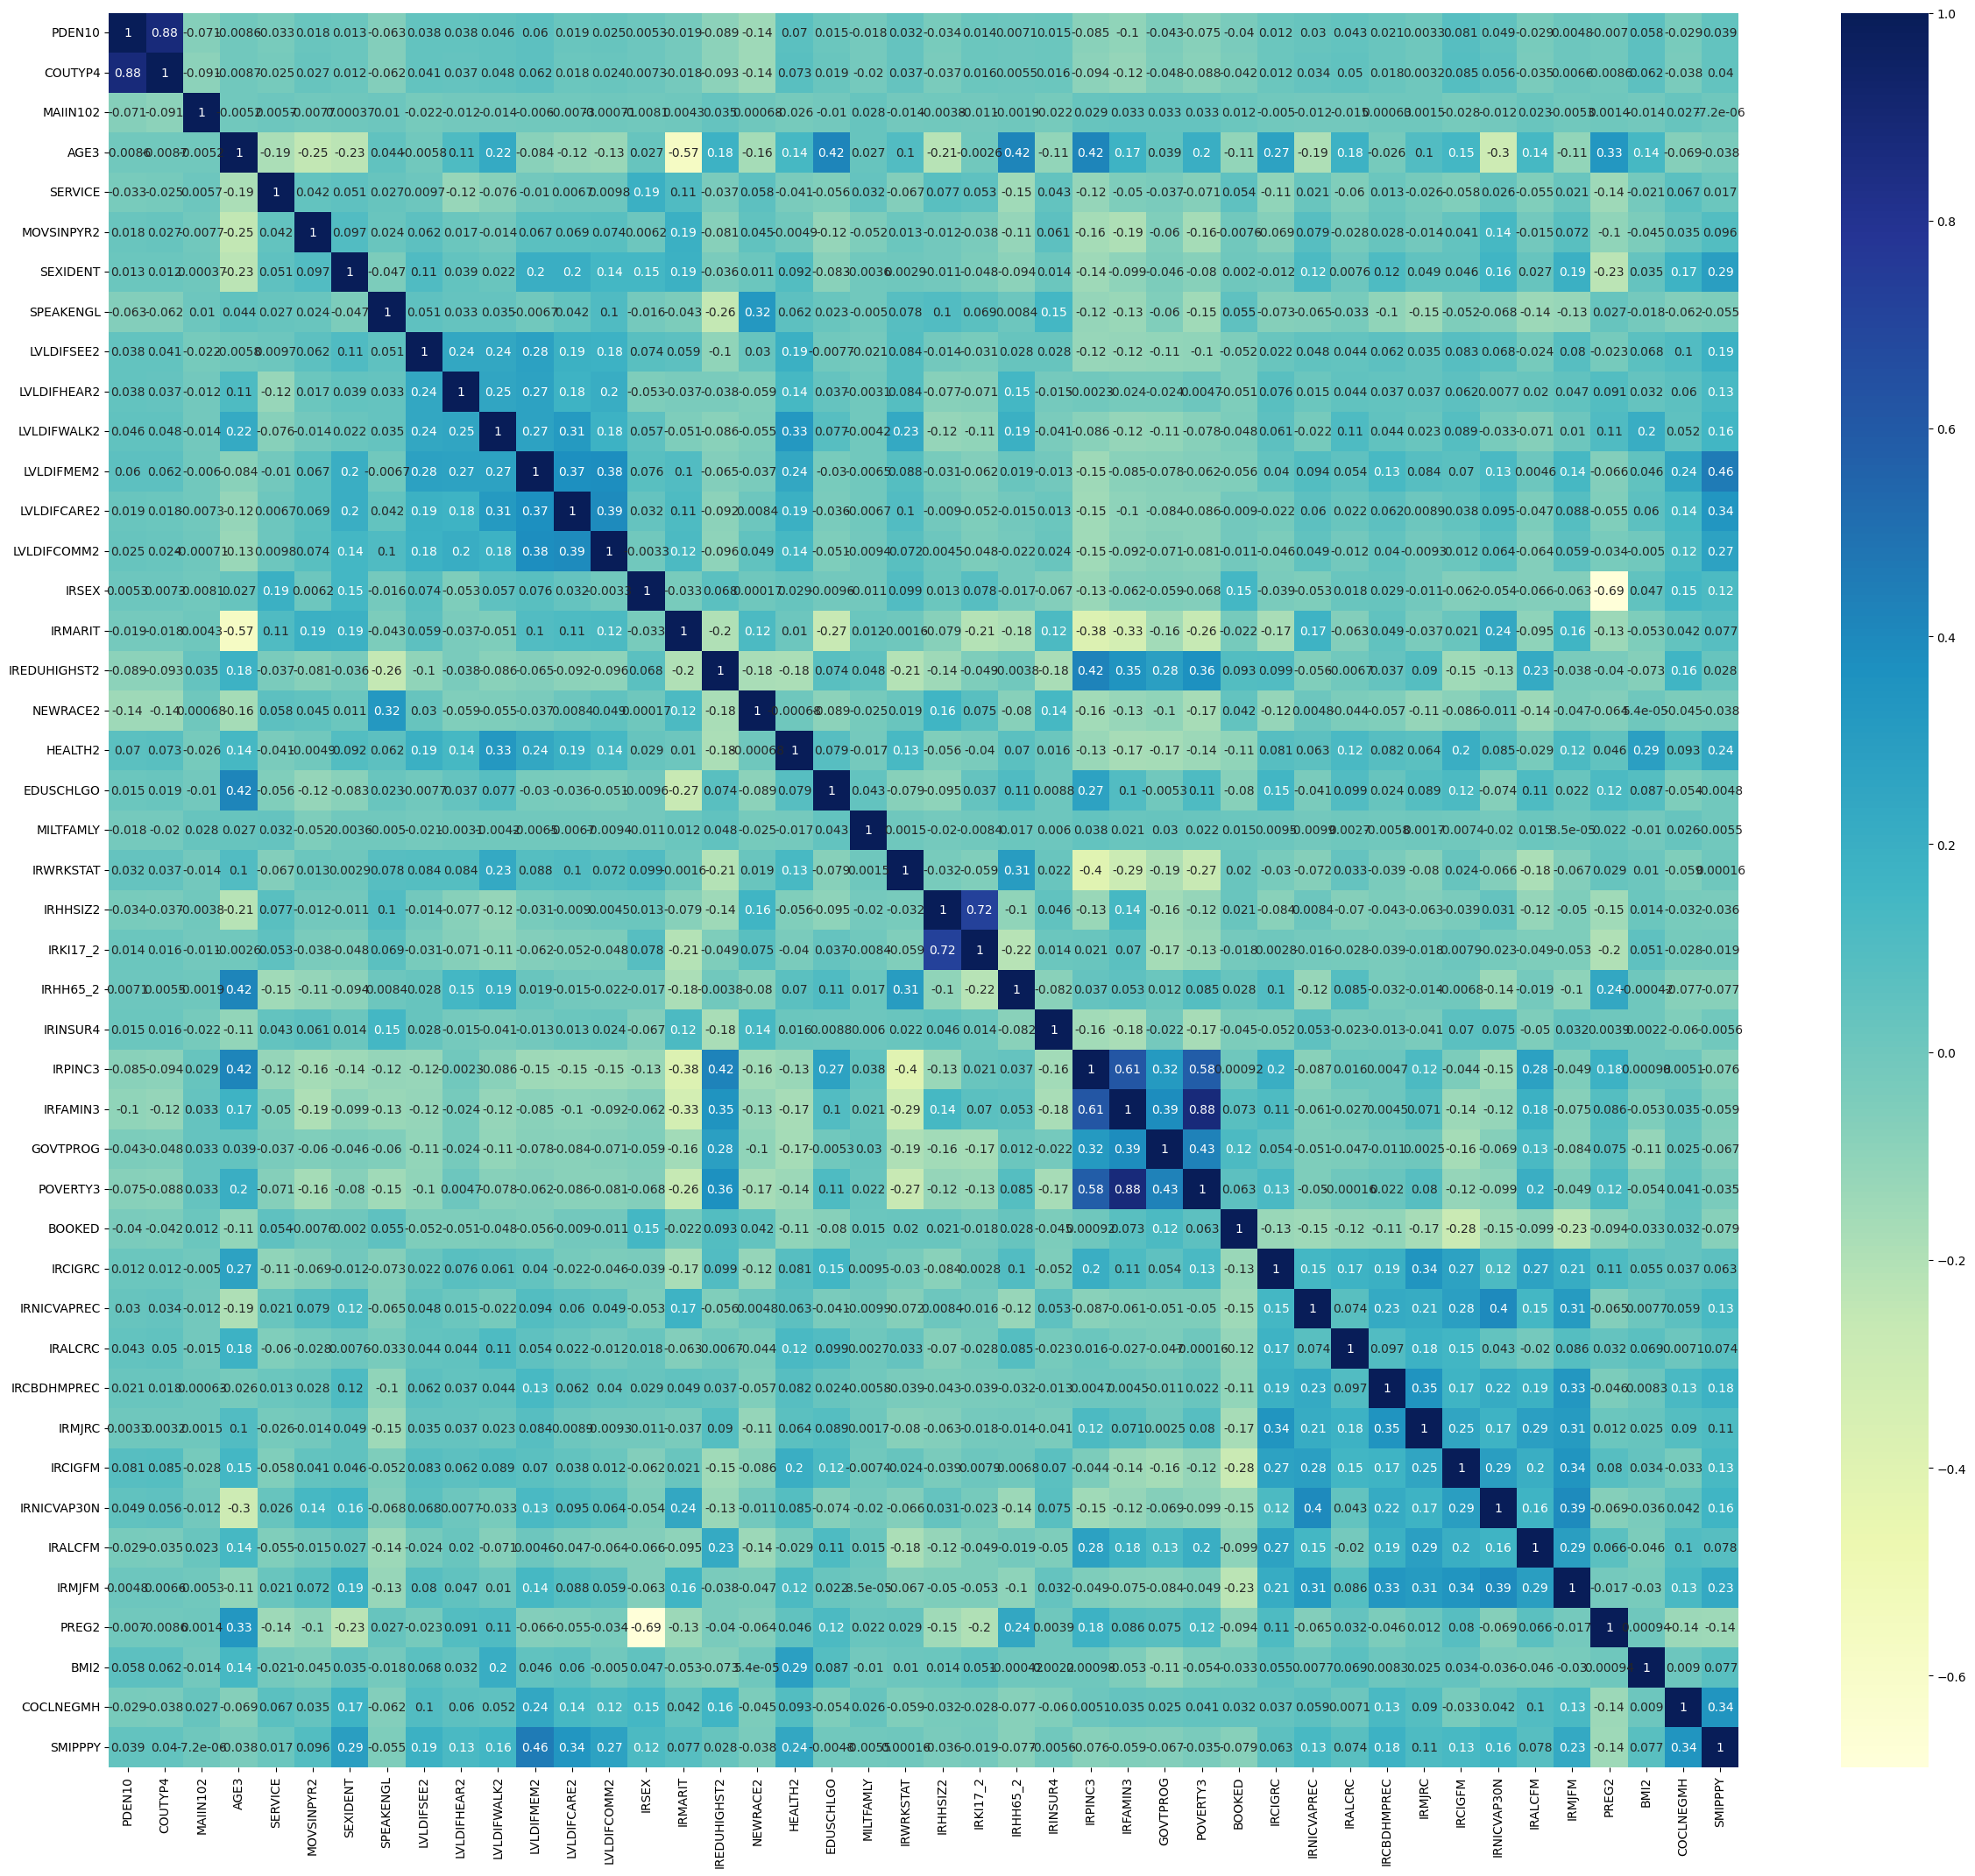

In [8]:
# design matrix
X = data.iloc[:,:len(columns)-2]

fig, ax = plt.subplots(figsize=(30,26))
sb.heatmap(X.corr(numeric_only=True), cmap="YlGnBu", annot=True, ax=ax)

PDEN10 and COUTY4 are very highly correlated, so we drop one of them (refer back to Capstone_Project.ipynb)